# The Data Incubator Fellowship Project: Disney Waiting Times

In [1]:
import pandas as pd
%matplotlib inline

upload the data sets. https://touringplans.com/walt-disney-world/crowd-calendar#DataSets
14 ride files, 1 metadata file, 1 entitites file.

In [2]:
dwarfs = pd.read_csv('../7_dwarfs_train.csv', sep=',')
alien = pd.read_csv('../alien_saucers.csv', sep=',')
dinosaur = pd.read_csv('../dinosaur.csv', sep=',')
everest = pd.read_csv('../expedition_everest.csv', sep=',')
flight = pd.read_csv('../flight_of_passage.csv', sep=',')
safari = pd.read_csv('../kilimanjaro_safaris.csv', sep=',')
navi = pd.read_csv('../navi_river.csv', sep=',')
pirates = pd.read_csv('../pirates_of_caribbean.csv', sep=',')
aerosmith = pd.read_csv('../rock_n_rollercoaster.csv', sep=',')
slinky = pd.read_csv('../slinky_dog.csv', sep=',')
soarin = pd.read_csv('../soarin.csv', sep=',')
spaceship = pd.read_csv('../spaceship_earth.csv', sep=',')
splash = pd.read_csv('../splash_mountain.csv', sep=',')
toystory = pd.read_csv('../toy_story_mania.csv', sep=',')
metadata = pd.read_csv('../metadata.csv', sep=',')
entities = pd.read_csv('../entities.csv', sep=',')

In [3]:
entities

,name,short_name,land,average_wait_per_hundred,opened_on,duration
0,Kilimanjaro Safaris,Kilimanjaro Safaris,Africa,4,04/22/1998,20
1,Expedition Everest - Legend of the Forbidden M...,Expedition Everest,Asia,4,04/07/2006,4
2,DINOSAUR,DINOSAUR,DinoLand U.S.A.,3,04/22/1998,4
3,Na'vi River Journey,Na'vi River,Pandora - The World of Avatar,5,05/27/2017,5
4,Avatar Flight of Passage,Flight of Passage,Pandora - The World of Avatar,4,05/27/2017,6
5,Spaceship Earth,Spaceship Earth,Future World,3,10/01/1982,16
6,Soarin',Soarin',Future World,4,05/05/2005,6
7,Slinky Dog Dash,Slinky Dog,Toy Story Land,5,06/30/2018,3
8,Alien Swirling Saucers,Alien Saucers,Toy Story Land,10,06/30/2018,3
9,Rock 'n' Roller Coaster Starring Aerosmith,Rock Coaster,Sunset Boulevard,3,07/29/1999,2


In [4]:
metadata.head()

,DATE,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,01/01/2012,NaN,1,0,1,1,2012,CHRISTMAS PEAK,0,5,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
1,01/02/2012,NaN,2,1,1,1,2012,CHRISTMAS,2,5,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
2,01/03/2012,NaN,3,2,1,1,2012,CHRISTMAS,3,0,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
3,01/04/2012,NaN,4,3,1,1,2012,CHRISTMAS,4,0,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
4,01/05/2012,NaN,5,4,1,1,2012,CHRISTMAS,5,0,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN


In [5]:
count_peryear = metadata[['DATE','SEASON']].groupby('SEASON', as_index=False).count()
count_peryear

,SEASON,DATE
0,CHRISTMAS,127
1,CHRISTMAS PEAK,43
2,COLUMBUS DAY,28
3,EASTER,152
4,FALL,302
5,HALLOWEEN,36
6,JERSEY WEEK,70
7,JULY 4TH,35
8,MARDI GRAS,23
9,MARTIN LUTHER KING JUNIOR DAY,72


In [6]:
dwarfs.tail(5)

,date,datetime,SPOSTMIN,SACTMIN
257287,06/30/2019,2019-06-30 21:27:00,80.0,NaN
257288,06/30/2019,2019-06-30 21:34:00,80.0,NaN
257289,06/30/2019,2019-06-30 21:41:00,80.0,NaN
257290,06/30/2019,2019-06-30 21:48:00,80.0,NaN
257291,06/30/2019,2019-06-30 21:55:00,80.0,NaN


## Preparing, cleaning and visualizing the data
we will work only with the date, the hour and SPOSTMIN

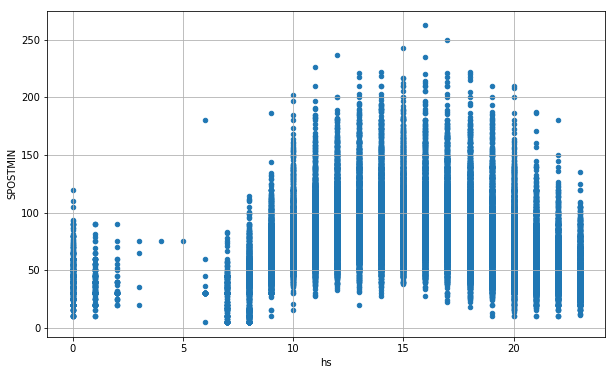

In [7]:
dwarfs=dwarfs[dwarfs['SPOSTMIN']>0]
dwarfs[['day','time']]=dwarfs['datetime'].str.split(' ', expand=True)
dwarfs[['hs','min','sec']]=dwarfs['time'].str.split(':', expand=True)
dwarfs=dwarfs.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
dwarfs['hs']=pd.to_numeric(dwarfs['hs'])
mean_dwarfs = dwarfs[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_dwarfs.plot.scatter(x='hs', y='SPOSTMIN', figsize=(10,6), grid=True)

As we can see there is a scatter in the hour: not all the days are the same!

In [8]:
mean_dwarfs['SPOSTMIN'].isnull().any()

False

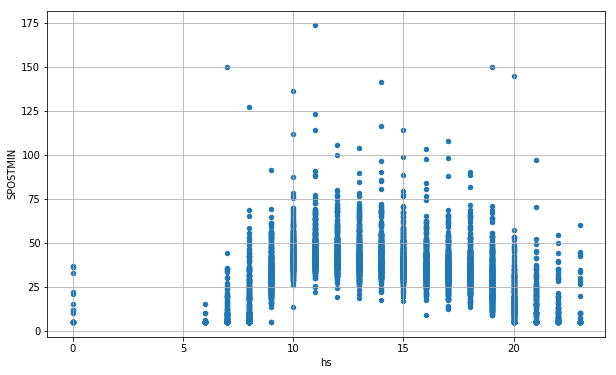

In [9]:
alien=alien[alien['SPOSTMIN']>0]
alien[['day','time']]=alien['datetime'].str.split(' ', expand=True)
alien[['hs','min','sec']]=alien['time'].str.split(':', expand=True)
alien=alien.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
alien['hs']=pd.to_numeric(alien['hs'])
mean_alien = alien[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_alien.plot.scatter(x='hs', y='SPOSTMIN', figsize=(10,6), grid=True)

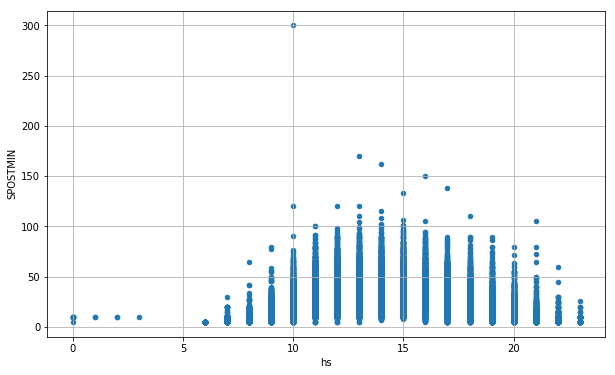

In [10]:
dinosaur=dinosaur[dinosaur['SPOSTMIN']>0]
dinosaur[['day','time']]=dinosaur['datetime'].str.split(' ', expand=True)
dinosaur[['hs','min','sec']]=dinosaur['time'].str.split(':', expand=True)
dinosaur=dinosaur.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
dinosaur['hs']=pd.to_numeric(dinosaur['hs'])
mean_dinosaur = dinosaur[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_dinosaur.plot.scatter(x='hs', y='SPOSTMIN', figsize=(10,6), grid=True)

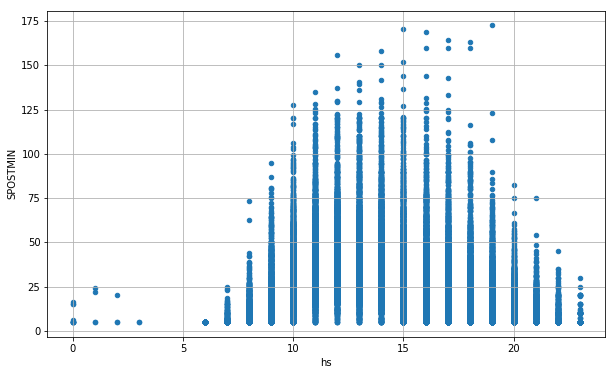

In [11]:
everest=everest[everest['SPOSTMIN']>0]
everest[['day','time']]=everest['datetime'].str.split(' ', expand=True)
everest[['hs','min','sec']]=everest['time'].str.split(':', expand=True)
everest=everest.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
everest['hs']=pd.to_numeric(everest['hs'])
mean_everest = everest[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_everest.plot.scatter(x='hs', y='SPOSTMIN', figsize=(10,6), grid=True)

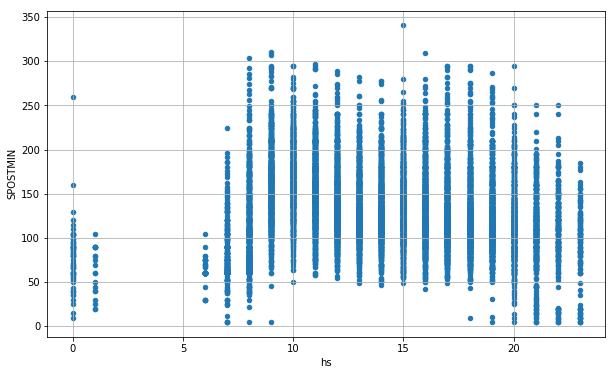

In [12]:
flight=flight[flight['SPOSTMIN']>0]
flight[['day','time']]=flight['datetime'].str.split(' ', expand=True)
flight[['hs','min','sec']]=flight['time'].str.split(':', expand=True)
flight=flight.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
flight['hs']=pd.to_numeric(flight['hs'])
mean_flight = flight[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_flight.plot.scatter(x='hs', y='SPOSTMIN', figsize=(10,6), grid=True)

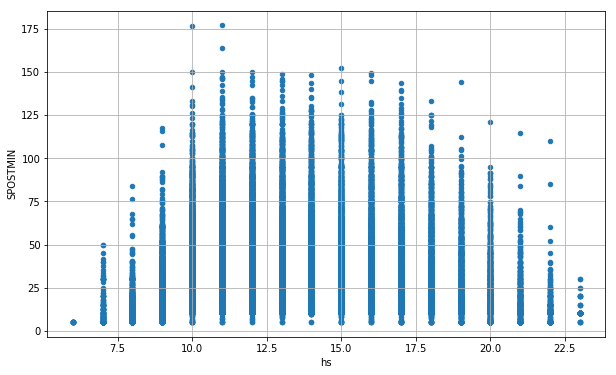

In [13]:
safari=safari[safari['SPOSTMIN']>0]
safari[['day','time']]=safari['datetime'].str.split(' ', expand=True)
safari[['hs','min','sec']]=safari['time'].str.split(':', expand=True)
safari=safari.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
safari['hs']=pd.to_numeric(safari['hs'])
mean_safari = safari[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_safari.plot.scatter(x='hs', y='SPOSTMIN', figsize=(10,6), grid=True)

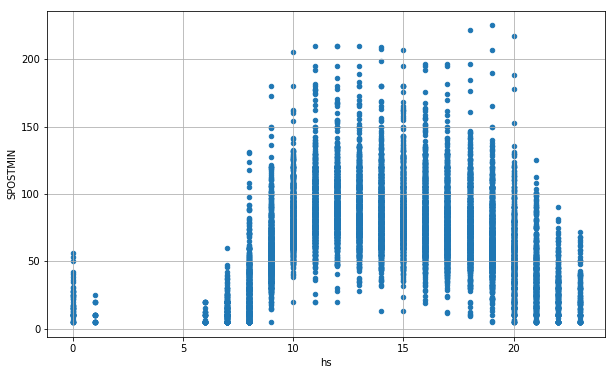

In [14]:
navi=navi[navi['SPOSTMIN']>0]
navi[['day','time']]=navi['datetime'].str.split(' ', expand=True)
navi[['hs','min','sec']]=navi['time'].str.split(':', expand=True)
navi=navi.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
navi['hs']=pd.to_numeric(navi['hs'])
mean_navi = navi[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_navi.plot.scatter(x='hs', y='SPOSTMIN', figsize=(10,6), grid=True)

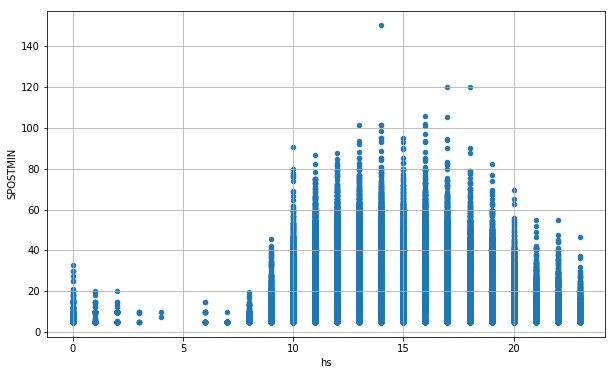

In [15]:
pirates=pirates[pirates['SPOSTMIN']>0]
pirates[['day','time']]=pirates['datetime'].str.split(' ', expand=True)
pirates[['hs','min','sec']]=pirates['time'].str.split(':', expand=True)
pirates=pirates.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
pirates['hs']=pd.to_numeric(pirates['hs'])
mean_pirates = pirates[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_pirates.plot.scatter(x='hs', y='SPOSTMIN', figsize=(10,6), grid=True)

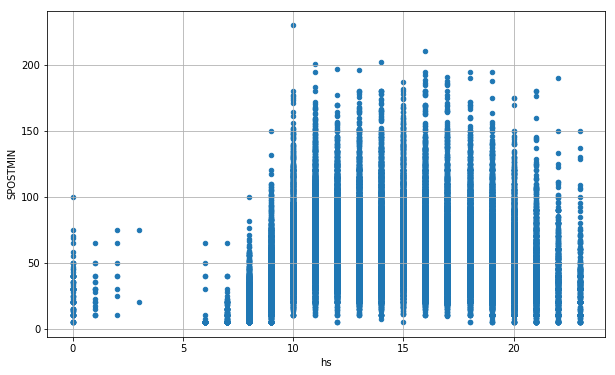

In [16]:
aerosmith=aerosmith[aerosmith['SPOSTMIN']>0]
aerosmith[['day','time']]=aerosmith['datetime'].str.split(' ', expand=True)
aerosmith[['hs','min','sec']]=aerosmith['time'].str.split(':', expand=True)
aerosmith=aerosmith.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
aerosmith['hs']=pd.to_numeric(aerosmith['hs'])
mean_aerosmith = aerosmith[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_aerosmith.plot.scatter(x='hs', y='SPOSTMIN', figsize=(10,6), grid=True)

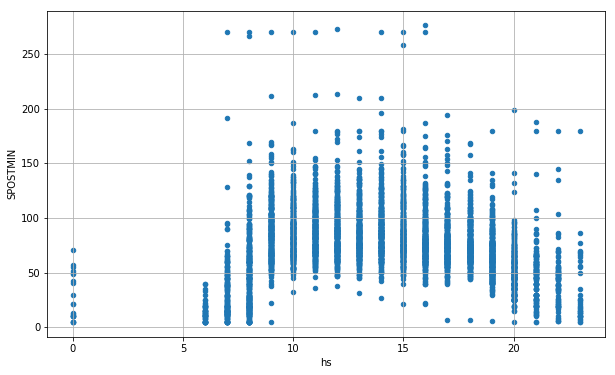

In [17]:
slinky=slinky[slinky['SPOSTMIN']>0]
slinky[['day','time']]=slinky['datetime'].str.split(' ', expand=True)
slinky[['hs','min','sec']]=slinky['time'].str.split(':', expand=True)
slinky=slinky.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
slinky['hs']=pd.to_numeric(slinky['hs'])
mean_slinky = slinky[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_slinky.plot.scatter(x='hs', y='SPOSTMIN', figsize=(10,6), grid=True)

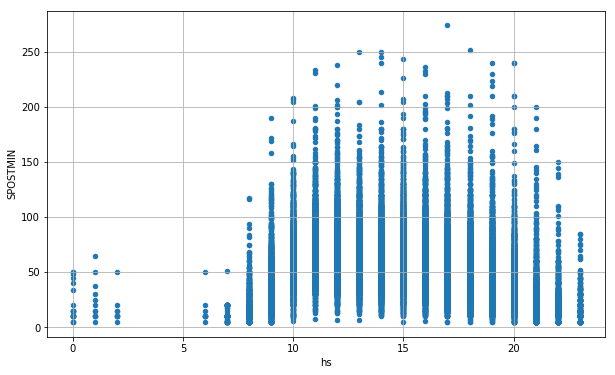

In [18]:
soarin=soarin[soarin['SPOSTMIN']>0]
soarin[['day','time']]=soarin['datetime'].str.split(' ', expand=True)
soarin[['hs','min','sec']]=soarin['time'].str.split(':', expand=True)
soarin=soarin.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
soarin['hs']=pd.to_numeric(soarin['hs'])
mean_soarin = soarin[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_soarin.plot.scatter(x='hs', y='SPOSTMIN', figsize=(10,6), grid=True)

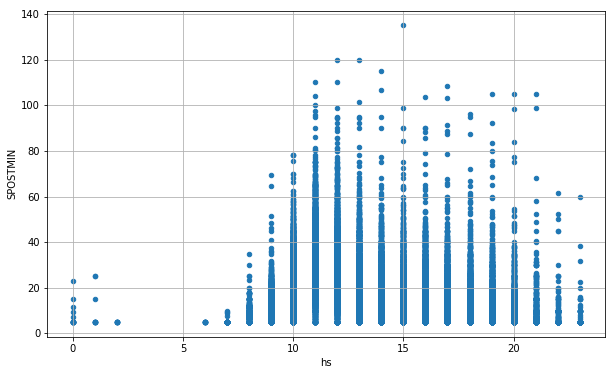

In [19]:
spaceship=spaceship[spaceship['SPOSTMIN']>0]
spaceship[['day','time']]=spaceship['datetime'].str.split(' ', expand=True)
spaceship[['hs','min','sec']]=spaceship['time'].str.split(':', expand=True)
spaceship=spaceship.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
spaceship['hs']=pd.to_numeric(spaceship['hs'])
mean_spaceship = spaceship[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_spaceship.plot.scatter(x='hs', y='SPOSTMIN', figsize=(10,6), grid=True)

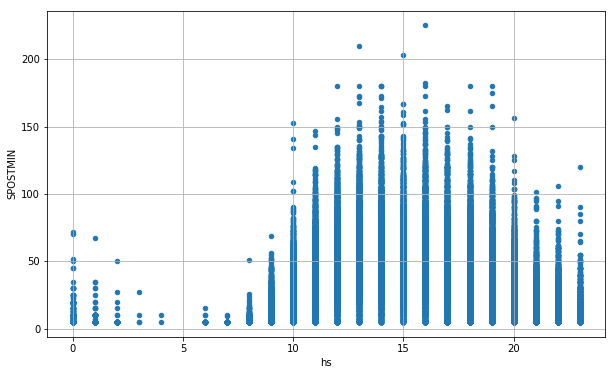

In [20]:
splash=splash[splash['SPOSTMIN']>0]
splash[['day','time']]=splash['datetime'].str.split(' ', expand=True)
splash[['hs','min','sec']]=splash['time'].str.split(':', expand=True)
splash=splash.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
splash['hs']=pd.to_numeric(splash['hs'])
mean_splash = splash[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_splash.plot.scatter(x='hs', y='SPOSTMIN', figsize=(10,6), grid=True)

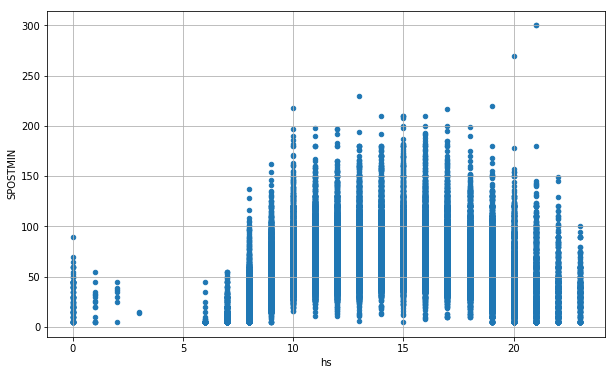

In [21]:
toystory=toystory[toystory['SPOSTMIN']>0]
toystory[['day','time']]=toystory['datetime'].str.split(' ', expand=True)
toystory[['hs','min','sec']]=toystory['time'].str.split(':', expand=True)
toystory=toystory.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
toystory['hs']=pd.to_numeric(toystory['hs'])
mean_toystory = toystory[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_toystory.plot.scatter(x='hs', y='SPOSTMIN', figsize=(10,6), grid=True)

let's merge all the tables by date and hs

In [54]:
full = pd.merge(mean_splash, mean_toystory, on=['date','hs'], how='outer')

In [55]:
full.head(10)

,date,hs,SPOSTMIN_x,SPOSTMIN_y
0,01/01/2012,1,10.000000,NaN
1,01/01/2012,10,30.000000,50.000000
2,01/01/2012,12,28.750000,60.000000
3,01/01/2012,14,80.000000,NaN
4,01/01/2012,15,60.000000,75.000000
5,01/01/2013,8,5.000000,10.000000
6,01/01/2013,9,5.000000,42.500000
7,01/01/2013,10,21.500000,62.857143
8,01/01/2013,11,35.000000,90.000000
9,01/01/2013,12,56.666667,100.000000
